## Q2

In [10]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

import torch
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from Utils import *
from Templates import *
from torch.utils.data import Dataset, DataLoader

In [11]:
trainset = DataAugment('./dataset/',type = 1,train= True)
train_loader = DataLoader(trainset, batch_size = 10, shuffle = True)

testset = DataAugment('./dataset/',type = 1,train= False)
test_loader = DataLoader(testset, batch_size = 10, shuffle = True)


In [15]:
epochs = 10
lr = 1e-3
device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")
log_interval = 20
trained = False
path = './Models/'
save = True

net = Model().to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr = lr) 

train_losses = []
train_loss = 0

if trained:
    d = torch.load(path+'q2.pth')
    train_losses = d['train_losses']
    net.load_state_dict(d['state_dict'])

In [16]:
for e in range(epochs):
    net.train()
    for idx, data in enumerate(train_loader):
        inpt = data['x'].to(device)
        mask = data['y_mask'].to(device)
        
        optimizer.zero_grad()
        output = net(inpt)
        loss = criterion(output,mask)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        
        if idx %log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                e, idx, len(train_loader),
                100. * idx*len(data) / len(train_loader.dataset), loss.item()))
            d = {'state_dict':net.state_dict(), 'train_losses': train_losses}
            torch.save(d,path + 'q2.pth')
            print("Model Saved Epoch: {},Idx:{}".format(e,idx))
    
    train_loss /= len(train_loader.dataset)
    train_loss.append(train_loss)
        
    

Train Epoch: 0 [0/6000 (0%)]	Loss: 0.641740
Model Saved Epoch: 0,Idx:0
Train Epoch: 0 [20/6000 (0%)]	Loss: 0.389160
Model Saved Epoch: 0,Idx:20
Train Epoch: 0 [40/6000 (0%)]	Loss: 0.174107
Model Saved Epoch: 0,Idx:40
Train Epoch: 0 [60/6000 (0%)]	Loss: 0.129462
Model Saved Epoch: 0,Idx:60
Train Epoch: 0 [80/6000 (0%)]	Loss: 0.075831
Model Saved Epoch: 0,Idx:80
Train Epoch: 0 [100/6000 (0%)]	Loss: 0.064705
Model Saved Epoch: 0,Idx:100


KeyboardInterrupt: 

In [ ]:
print(data['y_mask'].shape)
print(out.shape)
criterion(out,data['y_mask'])

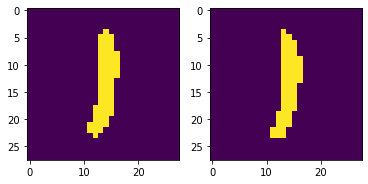

In [22]:
idx,data = next(enumerate(train_loader))
output = net(data['x'])
plt.subplot(1,2,1)
plt.imshow((output[0].detach() >0.5).numpy()[0])
plt.subplot(1,2,2)
plt.imshow(data['y_mask'][0].numpy()[0])
a = data['y_mask'][0].numpy()[0]
b = (output[0].detach() >0.5 ).numpy()[0]

In [9]:
print(np.logical_and(a == 1,b == 1).sum())
print(np.logical_or(a == 1,b == 1).sum())

70
85


In [ ]:
JSim1(net,test_loader,device)